# Dark Web Traffic Detection and Characterization system - by Mohammad Yusuf

In [1]:
#importing python libraries
import numpy as np
import pandas as pd

In [2]:
#Load the dataset: CIC-Darknet-2020
df = pd.read_csv('Darknet2020.csv', error_bad_lines=False)
df.head()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_23748\3259108598.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Darknet2020.csv', error_bad_lines=False)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [3]:
#85 columns of the dataset
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [4]:
#Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [5]:
#Correlation matrix
corr = df.corr()
corr.head()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_23748\2559860652.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Src Port,1.000000,-0.246451,-0.097384,0.065328,-0.036259,-0.014248,-0.019712,-0.008271,0.076486,-0.090022,...,-0.028619,0.138354,NaN,NaN,NaN,NaN,0.073322,0.058640,0.077872,0.031325
Dst Port,-0.246451,1.000000,-0.321199,0.039227,0.022094,0.014775,0.004451,0.010865,0.004448,-0.178715,...,0.014722,0.246275,NaN,NaN,NaN,NaN,0.069783,-0.000714,0.064389,0.060123
Protocol,-0.097384,-0.321199,1.000000,-0.266954,-0.034735,-0.026164,-0.023039,-0.020874,-0.195123,0.564044,...,-0.023370,-0.872467,NaN,NaN,NaN,NaN,-0.222856,-0.155842,-0.236589,-0.129430
Flow Duration,0.065328,0.039227,-0.266954,1.000000,0.142110,0.100288,0.072529,0.057008,0.340744,-0.068930,...,0.145455,0.240411,NaN,NaN,NaN,NaN,0.505334,0.127554,0.506068,0.409003
Total Fwd Packet,-0.036259,0.022094,-0.034735,0.142110,1.000000,0.744834,0.457391,0.635688,0.125575,-0.020982,...,0.698507,0.029652,NaN,NaN,NaN,NaN,0.066403,-0.017735,0.062264,0.074037


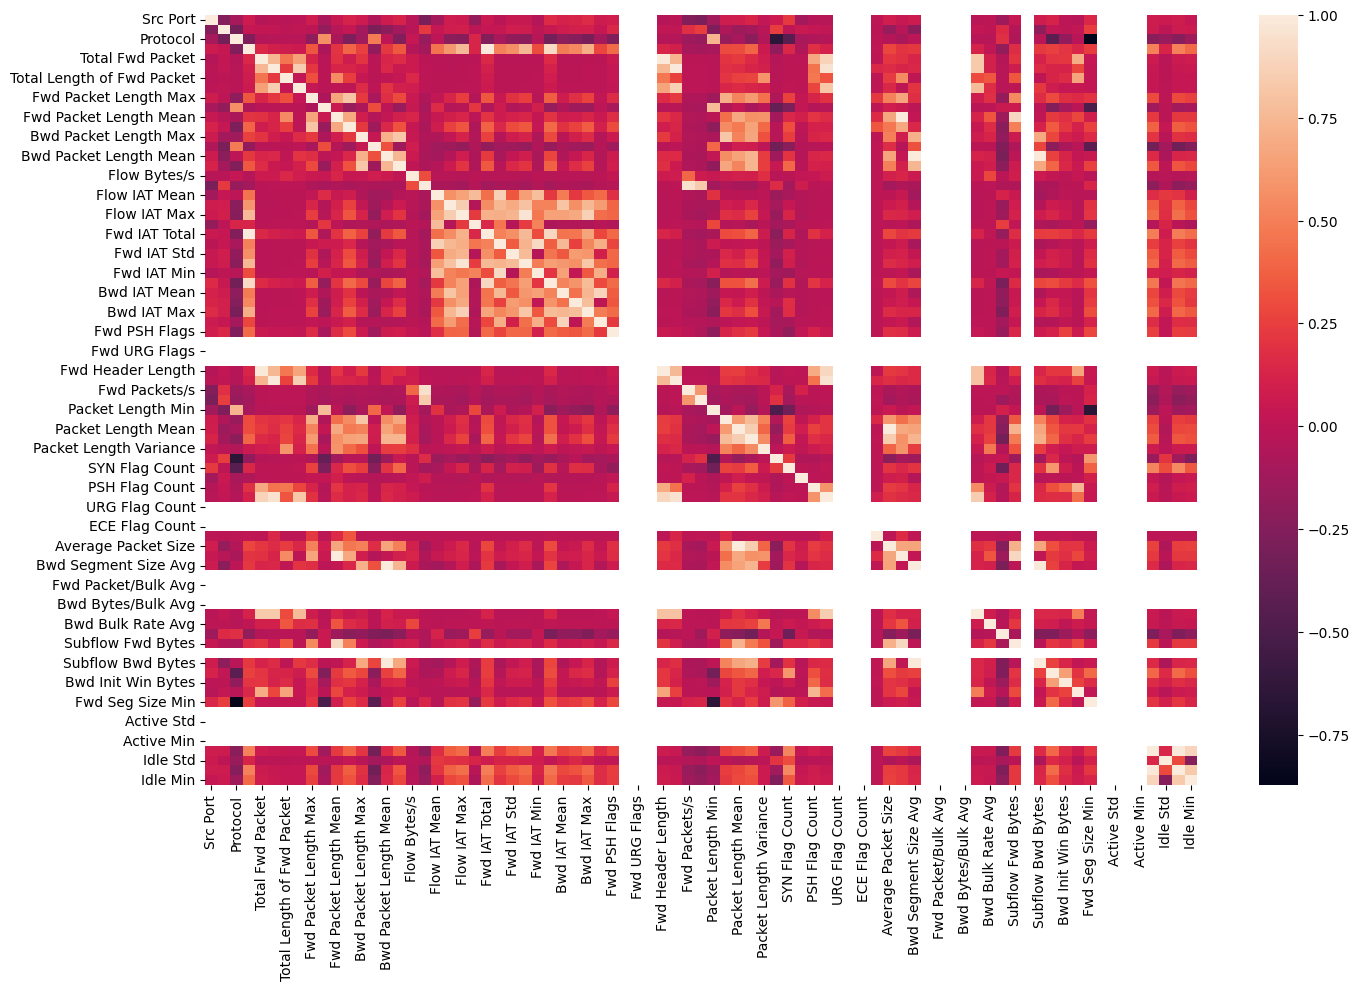

In [6]:
#Correlation matrix in the form of heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

sns.heatmap(corr)
plt.show()

# Cleaning of data

dealing with missing values,inf values.
dealing with ip octets

In [7]:
df.dropna() #dropping null values

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [8]:
df.isnull().sum().head() #to check the number of null values in each column

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
dtype: int64

In [9]:
df['Label'].value_counts()  #to check the number of classes in Label

Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: Label, dtype: int64

In [10]:
df['Label.1'].value_counts() #to check the number of classes in Label

P2P                48520
Browsing           32808
Audio-Streaming    16580
Chat               11478
File-Transfer      11098
Video-Streaming     9486
Email               6145
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: Label.1, dtype: int64

In [11]:
#splitting the Src IP into octets,getting first two ocets
newIP = []
for value in df['Src IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]
#     print(octet2)
    newIP.append(float(octet1 + '.' + octet2))

    

In [12]:
df1 = pd.DataFrame(newIP)  #a new dataframe with the above obtained series
df1.head()

,0
0,10.152
1,10.152
2,10.152
3,10.152
4,10.152


In [13]:
df['Src IP'] = df1  #replacing column Src IP with df1
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [14]:
newIP1 = [] #splitting the Dst IP into octets,getting first two ocets
for value in df['Dst IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]
    
#     print(octet2)
    newIP1.append(float(octet1 + '.' + octet2))

In [15]:
df2 = pd.DataFrame(newIP1)
df2.head()

,0
0,216.580
1,216.580
2,216.580
3,74.125
4,173.194


In [16]:
df['Dst IP'] = df2
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


# Data Preprocessing: Encoding, Sampling, Normalisation

In [17]:
# label encoding the data : Label and Label.1
from sklearn.preprocessing import LabelEncoder 
  
Le = LabelEncoder() 
  
df['Label']= Le.fit_transform(df['Label'])
df['Label.1']= Le.fit_transform(df['Label.1'])


In [18]:
df.head()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,0,0


In [19]:
df5=df.drop(['Flow ID','Timestamp'], axis = 1) #dropping the unnecessary columns
df5.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,0,0




In the next 4 steps, i will be performing some operations on the below columns to convert it from exponential values to normal float values.



In [20]:
df5['Idle Mean']=df5['Idle Mean']/1e15

In [21]:
df5['Idle Max']=df5['Idle Max']/1e15

In [22]:
df5['Idle Min']=df5['Idle Min']/1e15

In [23]:
df5['Idle Std']=df5['Idle Std']/1e7

In [24]:
df5.head(5)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.43776,0.311772,1.43776,1.43776,0,0


In [25]:
df5.isnull().values.any() 

True

In [26]:
df5.fillna(df5.mean()).head(5) #filling null values with the mean of the column

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.43776,0.311772,1.43776,1.43776,0,0


In [27]:
df5.notnull().values.all() #this shows there are no more null values



False

In [28]:
df5=df5.astype(float)

In [29]:
# Replacing infinite with nan 
df5.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df5.dropna(inplace=True) 

In [30]:
df5.head(5)


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,0.0,0.0,0.0,0.0,1.43776,0.311772,1.43776,1.43776,0.0,0.0


# Sampling :Oversampling and Undersampling

1. Oversampling: to increase the number of minority classes
2. Undersampling: to decease the number of majority classes


In [31]:
df5['Label'].value_counts()

0.0    93309
1.0    23861
3.0    22919
2.0     1392
Name: Label, dtype: int64

So the data is highly imbalanced.....


Now I will undersample class 0.0 wrt class 1.0 and
oversample class 3.0 wrt class 2.0


In [32]:
#1. Find the number of the minority class
non_tor = len(df5[df5['Label']==0])
non_vpn = len(df5[df5['Label']==1])
vpn = len(df5[df5['Label']==2])
tor = len(df5[df5['Label']==3])

print(non_tor)
print(non_vpn)
print(vpn)
print(tor)

93309
23861
1392
22919


In [48]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df5.drop('Label', axis=1)
y = df5['Label']

# Perform SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create new dataframe with resampled data
balance_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)


In [49]:
balance_df['Label'].value_counts()

0.0    93309
1.0    93309
2.0    93309
3.0    93309
Name: Label, dtype: int64

In [50]:
balance_df.head()


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1,Label
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,0.0,0.0,0.0,0.0,1.43776,0.311772,1.43776,1.43776,0.0,0.0


In [51]:
#Forming a new dataframe for the target variable and removing it from the above dataset.
target = balance_df.filter(['Label'], axis=1)
target.head()

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [52]:
balance_df = balance_df.drop('Label', 1)
balance_df.head()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_23748\2581774163.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  balance_df = balance_df.drop('Label', 1)


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,20.0,0.0,0.0,0.0,0.0,1.43776,0.311772,1.43776,1.43776,0.0


MinMaxScaler for normalisation between 0 to 1.


In [53]:
#MinMaxScaling

import pandas as pd
from sklearn import preprocessing

x = balance_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_final = pd.DataFrame(x_scaled,columns = balance_df.columns)
df_final.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
0,0.045466,0.872188,0.847913,0.006760,0.352941,0.000002,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
1,0.045466,0.872204,0.847913,0.006760,0.352941,0.000003,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
2,0.045466,0.872219,0.847913,0.006760,0.352941,0.000004,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
3,0.045466,0.749748,0.287717,0.006760,0.352941,0.000003,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
4,0.045466,0.529450,0.677300,0.294575,0.352941,0.089820,0.002477,0.000850,0.000084,0.00001,...,0.454545,0.0,0.0,0.0,0.0,0.984767,3.026911e-09,0.984767,0.984767,0.0


In [54]:
corr1 = df_final.corr()
corr1.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
Src IP,1.000000,-0.305918,-0.103044,0.255580,0.049550,0.077373,0.209038,0.113877,0.183668,0.029831,...,0.011828,NaN,NaN,NaN,NaN,-0.073568,-0.043853,-0.077203,-0.052757,0.289424
Src Port,-0.305918,1.000000,0.428463,-0.368575,0.069717,-0.123705,-0.218590,-0.133565,-0.193998,-0.032613,...,0.053436,NaN,NaN,NaN,NaN,-0.061656,-0.010773,-0.063471,-0.069720,-0.087134
Dst IP,-0.103044,0.428463,1.000000,-0.432668,0.275388,-0.056150,-0.125435,-0.041405,-0.112823,0.011550,...,-0.146751,NaN,NaN,NaN,NaN,-0.166826,-0.031589,-0.167948,-0.152143,-0.079409
Dst Port,0.255580,-0.368575,-0.432668,1.000000,-0.265415,0.120973,0.171562,0.094659,0.145121,0.025914,...,0.193240,NaN,NaN,NaN,NaN,0.165594,0.030300,0.164713,0.147938,0.310617
Protocol,0.049550,0.069717,0.275388,-0.265415,1.000000,-0.466501,-0.189633,-0.178308,-0.158369,-0.093198,...,-0.808291,NaN,NaN,NaN,NaN,-0.535932,-0.080254,-0.535755,-0.491413,-0.249123



Getting a correlation matrix and a heatmap for all the columns of the final pre processed matrix which is ready to be fit into a model.


# Feature Selection

In [55]:
columns = np.full((corr1.shape[0],), True, dtype=bool)
for i in range(corr1.shape[0]):
    for j in range(i+1, corr1.shape[0]):
        if corr1.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_final.columns[columns]
dataset_final = df_final[selected_columns]

In [56]:
dataset_final.shape

(373236, 60)

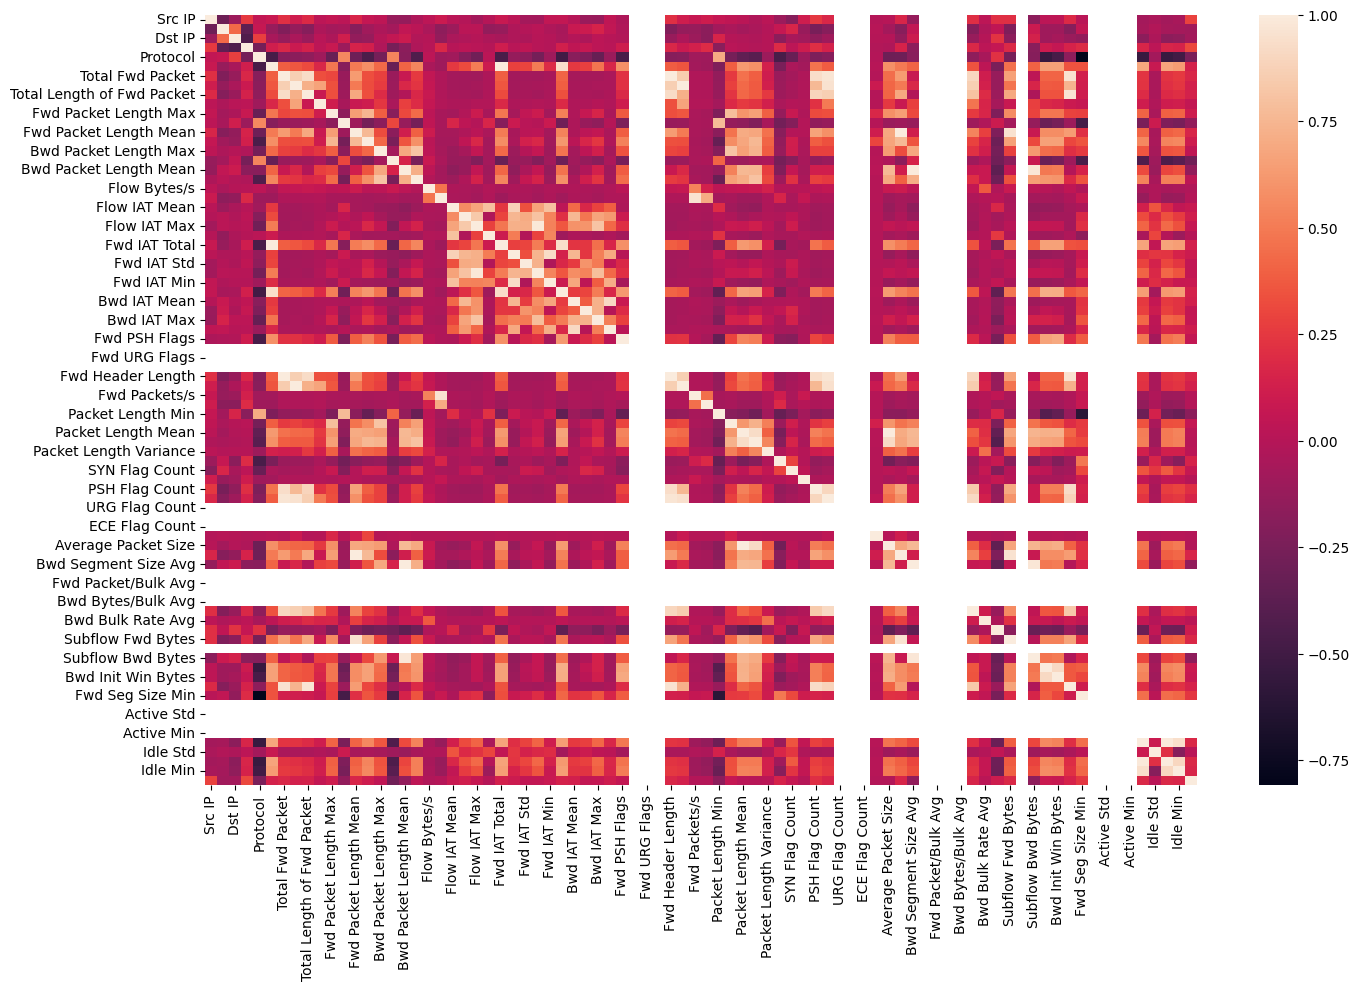

In [57]:
#Correlation matrix in the form of heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

sns.heatmap(corr1)
plt.show()

# Model Training 



                    
This phase includes:
•	Splitting into training and testing data
•	Defining the model: Gradient Boosting Classifier, LGM, XGBOOST, ADABOOST
•	Performing baseline tuning in the model on test dataset: Getting evaluation metrics
•	Performing Hyperparameter Tuning using 10 fold Cross Validation: Getting the best parameters
•	Testing the Tuned model on test dataset: Getting evaluation metrics
•	Comparing the models before and after tuning.

                    

In [58]:
#train_test_split
from sklearn.model_selection import train_test_split

y=target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [59]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.metrics import f1_score

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc=gbc.fit(x_train, y_train.values.ravel())
    y_pred_gbc=gbc.predict(x_test)
    f1_gbc = f1_score(y_test, y_pred_gbc,average='micro')
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbc.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbc.score(x_test, y_test)))
    print('F1-score: {}'.format(np.round(f1_gbc,4)))

Learning rate:  0.05
Accuracy score (training): 0.766
Accuracy score (validation): 0.765
F1-score: 0.7649
Learning rate:  0.075
Accuracy score (training): 0.788
Accuracy score (validation): 0.787
F1-score: 0.7866
Learning rate:  0.1
Accuracy score (training): 0.813
Accuracy score (validation): 0.811
F1-score: 0.8108
Learning rate:  0.25
Accuracy score (training): 0.883
Accuracy score (validation): 0.881
F1-score: 0.881
Learning rate:  0.5
Accuracy score (training): 0.915
Accuracy score (validation): 0.914
F1-score: 0.9139
Learning rate:  0.75
Accuracy score (training): 0.942
Accuracy score (validation): 0.941
F1-score: 0.9405
Learning rate:  1
Accuracy score (training): 0.948
Accuracy score (validation): 0.947
F1-score: 0.9468


In [60]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# making predictions with the Light Gradient Boosting classifier
lr_list = [0.01, 0.75, 1]

for learning_rate in lr_list:
    lgbm = LGBMClassifier(boosting_type='dart',max_depth=3, learning_rate=learning_rate, n_estimators=200,random_state=45)
    lgbm = lgbm.fit(x_train, y_train.values.ravel())
    y_pred_lgbm = lgbm.predict(x_test)

    f1_lgbm = f1_score(y_test, y_pred_lgbm,average='micro')
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(lgbm.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(lgbm.score(x_test, y_test)))
    print('F1-score: {}'.format(np.round(f1_lgbm,4)))


Learning rate:  0.01
Accuracy score (training): 0.947
Accuracy score (validation): 0.946
F1-score: 0.9458
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.999
F1-score: 0.9991
Learning rate:  1
Accuracy score (training): 0.951
Accuracy score (validation): 0.950
F1-score: 0.9498


In [61]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBClassifier

# making predictions with the XGBoost
lr_list = [0.01, 0.5,0.75, 1]

for learning_rate in lr_list:
    xgb = XGBClassifier(learning_rate=learning_rate,
                        max_depth=4,
                        n_estimators=200,
                        random_state=45)
    xgb = xgb.fit(x_train, y_train.values.ravel())
    y_pred_xgb = xgb.predict(x_test)
    f1_xgb = f1_score(y_test, y_pred_xgb, average='micro')

    print("Learning rate: ", learning_rate)
    print('Accuracy of the XGBoost on test set: {:.3f}'.format(
        xgb.score(x_test, y_test)))
    print(classification_report(y_test, y_pred_xgb))
    print("Accuracy score (training): {0:.3f}".format(
        xgb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        xgb.score(x_test, y_test)))
    print('F1-score: {}'.format(np.round(f1_xgb, 4)))


Learning rate:  0.01
Accuracy of the XGBoost on test set: 0.977
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28038
         1.0       0.93      0.98      0.96     28129
         2.0       0.98      0.93      0.96     27940
         3.0       1.00      0.99      0.99     27864

    accuracy                           0.98    111971
   macro avg       0.98      0.98      0.98    111971
weighted avg       0.98      0.98      0.98    111971

Accuracy score (training): 0.979
Accuracy score (validation): 0.977
F1-score: 0.9772
Learning rate:  0.5
Accuracy of the XGBoost on test set: 0.999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28038
         1.0       1.00      1.00      1.00     28129
         2.0       1.00      1.00      1.00     27940
         3.0       1.00      1.00      1.00     27864

    accuracy                           1.00    111971
   macro avg       1.00    

In [63]:
from sklearn.ensemble import AdaBoostClassifier  #Adaboost algorithm
from sklearn.metrics import f1_score

lr_list = [0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    abc = AdaBoostClassifier(n_estimators=200, learning_rate=learning_rate, random_state=0)
    abc = abc.fit(x_train, y_train.values.ravel())
    y_pred_abc = abc.predict(x_test)
    f1_abc = f1_score(y_test, y_pred_abc, average='micro')
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(abc.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(abc.score(x_test, y_test)))
    print('F1-score: {}'.format(np.round(f1_abc,4)))


KeyboardInterrupt: 

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# making predictions with the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42,max_depth=5)
dtc = dtc.fit(x_train, y_train.values.ravel())
y_pred_dtc = dtc.predict(x_test)
print('Accuracy of the DTC on test set: {:.3f}'.format(dtc.score(x_test, y_test)))
print(classification_report(y_test, y_pred_dtc))


# making predictions with the k nearest neighbour model
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn= knn.fit(x_train, y_train.values.ravel())
y_pred_knn = knn.predict(x_test)
print('Accuracy of the KNN on test set: {:.3f}'.format(knn.score(x_test, y_test)))
print(classification_report(y_test, y_pred_knn))


# making predictions with the random forest model
rfc = RandomForestClassifier(n_estimators=200,max_depth=5)
rfc = rfc.fit(x_train, y_train.values.ravel())
y_pred_rfc = rfc.predict(x_test)
print('Accuracy of the Random Forest on test set: {:.3f}'.format(rfc.score(x_test, y_test)))
print(classification_report(y_test, y_pred_rfc))


# evaluating the models based on their f-1 scores
f1_dtc = f1_score(y_test, y_pred_dtc,average='micro')
f1_knn = f1_score(y_test, y_pred_knn,average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc,average='micro')

# print the f-1 scores
print('F1-score of decision tree classifier: {}'.format(np.round(f1_dtc,4)))
print('F1-score of k nearest neighbour: {}'.format(np.round(f1_knn,4)))
print('F1-score of random forest classifier: {}'.format(np.round(f1_rfc,4)))

Accuracy of the DTC on test set: 0.957
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     28038
         1.0       0.87      0.99      0.92     28129
         2.0       0.99      0.86      0.92     27940
         3.0       1.00      0.98      0.99     27864

    accuracy                           0.96    111971
   macro avg       0.96      0.96      0.96    111971
weighted avg       0.96      0.96      0.96    111971

Accuracy of the KNN on test set: 0.947
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     28038
         1.0       0.94      0.93      0.94     28129
         2.0       0.96      0.98      0.97     27940
         3.0       0.95      0.93      0.94     27864

    accuracy                           0.95    111971
   macro avg       0.95      0.95      0.95    111971
weighted avg       0.95      0.95      0.95    111971

Accuracy of the Random Forest on test set: 0.917
   

In [65]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,y_pred_knn)
print(cf_matrix)

[[26246   625   442   725]
 [  660 26295   426   748]
 [  164   279 27459    38]
 [  721   909   213 26021]]


<Axes: >

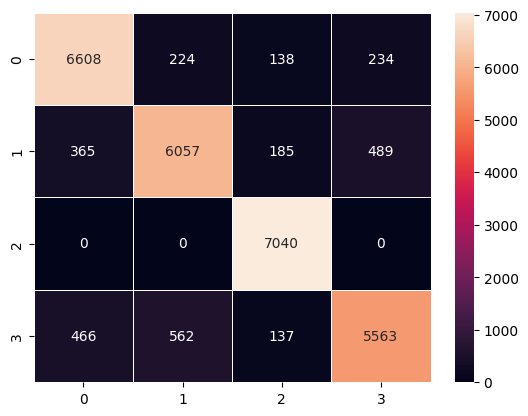

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt="d", linewidths=.5)

In [66]:
# import voting classifier
from sklearn.ensemble import VotingClassifier

# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42,max_depth=8)),
                  ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)),
                  ('rfc', RandomForestClassifier(n_estimators=200,max_depth=8))], 
                  
    voting='hard')

# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42,max_depth=8)),
                  ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)),
                  ('rfc',RandomForestClassifier(n_estimators=200,max_depth=8))], 
    voting='soft')

# make predictions with the hard voting model
voting_classifier_hard.fit(x_train, y_train.values.ravel())
y_pred_vch = voting_classifier_hard.predict(x_test)

# make predictions with the soft voting model
voting_classifier_soft.fit(x_train, y_train.values.ravel())
y_pred_vcs = voting_classifier_soft.predict(x_test)

# evaluate both models with the f-1 score
f1_vch = f1_score(y_test, y_pred_vch,average='micro')
f1_vcs = f1_score(y_test, y_pred_vcs,average='micro')

# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

F1-score of the hard voting classifier: 0.9851
F1-score of the soft voting classifier: 0.9933


In [ ]:
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

VCH_accuracies = cross_val_score(estimator = voting_classifier_hard, X = x_train, y = y_train.values.ravel(), cv = cv)
print("Mean_Acc_VotingHard : ", VCH_accuracies.mean())

VCS_accuracies = cross_val_score(estimator = voting_classifier_soft, X = x_train, y = y_train.values.ravel(), cv = cv)
print("Mean_Acc_VotingSoft : ", VCS_accuracies.mean())

Mean_Acc_VotingHard :  0.9910370652707308
Mean_Acc_VotingSoft :  0.9941824834279227


# Hyperparameter Tuning

In [ ]:
#HyperParameter Tuning: Learning rate,n_estimators_max_depth (using 5 fold Grid search CV)
from sklearn.model_selection import GridSearchCV


params= {'knn__n_neighbors':[5,10,8], 'rfc__n_estimators':[100,200,300],'rfc__max_depth':[5,8,10]}

tuning = GridSearchCV(estimator=voting_classifier_hard, param_grid=params, cv=5,verbose=3)
tuning.fit(x_train,y_train.values.ravel())

print('The best Parameters are:',tuning.best_params_)
print('The best score is:',tuning.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100;, score=0.969 total time=  10.5s
[CV 2/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100;, score=0.964 total time=  10.0s
[CV 3/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100;, score=0.968 total time=  10.2s
[CV 4/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100;, score=0.973 total time=  10.1s
[CV 5/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100;, score=0.973 total time=   9.9s
[CV 1/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200;, score=0.968 total time=  17.4s
[CV 2/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200;, score=0.969 total time=  17.2s
[CV 3/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200;, score=0.970 total time=  17.3s
[CV 4/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200;, score=0.972 tot

In [ ]:
#HyperParameter Tuning:n_neighbors,n_estimators,_max_depth (using 5 fold Grid search CV)
from sklearn.model_selection import GridSearchCV


params= {'knn__n_neighbors':[5,8,10], 'rfc__n_estimators':[100,200,300],'rfc__max_depth':[5,8,10]}

tuning = GridSearchCV(estimator=voting_classifier_soft, param_grid=params, cv=5,verbose=0)
tuning.fit(x_train,y_train.values.ravel())

print('The best Parameters are:',tuning.best_params_)
print('The best score is:',tuning.best_score_)

The best Parameters are: {'knn__n_neighbors': 5, 'rfc__max_depth': 10, 'rfc__n_estimators': 100}
The best score is: 0.9962438213955667


In [ ]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix1 = confusion_matrix(y_test,y_pred_xgb)
print(cf_matrix1)

[[7204    0    0    0]
 [   0 7084   12    0]
 [   0    0 7040    0]
 [   0    0    0 6728]]


<Axes: >

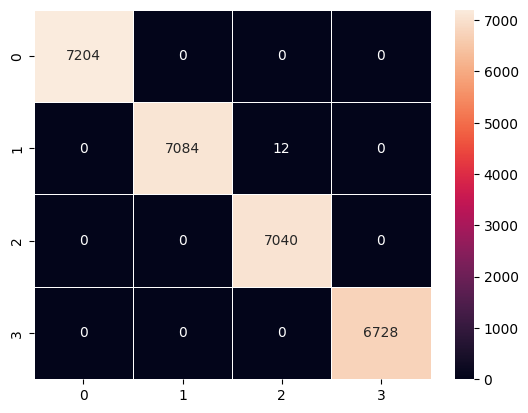

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix1, annot=True, fmt="d", linewidths=.5)

# Result

So for Voting Classifier on Darknet2020, while predicting Label, the best accuracy obtained is 99.62%.

In [ ]:
from joblib import dump

# save the soft voting classifier
dump(voting_classifier_soft, 'voting_classifier_soft.joblib')
dump(voting_classifier_hard, 'voting_classifier_hard.joblib')


['voting_classifier_hard.joblib']

In [ ]:
#Load the dataset: CIC-Darknet-2020
testing = pd.read_csv('sample.pcap_Flow.csv', error_bad_lines=False)
testing.head()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_9956\439508773.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  testing = pd.read_csv('sample.pcap_Flow.csv', error_bad_lines=False)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,142.250.193.5-10.10.217.8-443-52323-6,142.250.193.5,443,10.10.217.8,52323,6,28-04-2023 09:14,1822203,4,1,...,0,0,0,0,0,0,0,0,0,VPN
1,142.250.193.5-10.10.217.8-443-52324-6,142.250.193.5,443,10.10.217.8,52324,6,28-04-2023 09:14,463018,2,1,...,0,0,0,0,0,0,0,0,0,VPN
2,10.10.216.33-10.10.217.8-50652-7680-6,10.10.216.33,50652,10.10.217.8,7680,6,28-04-2023 09:14,6970401,3,1,...,0,0,0,0,0,0,0,0,0,VPN
3,10.10.216.33-10.10.217.8-50651-7680-6,10.10.216.33,50651,10.10.217.8,7680,6,28-04-2023 09:14,7956770,1,1,...,0,0,0,0,0,7956770,0,7956770,7956770,VPN
4,185.107.56.130-10.10.217.8-443-52434-6,185.107.56.130,443,10.10.217.8,52434,6,28-04-2023 09:14,10047270,2153,2015,...,0,0,0,0,0,0,0,0,0,VPN
